In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [2]:
import pickle

In [3]:
with open('df_unsw_train50_with_preprocessing_labelencoder_standadscaler', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (889011, 41)
X teste =  (381005, 41)
y multiclasse treino =  (889011,)
y multiclasse teste =  (381005,)
y binário treino =  (889011,)
y binário teste =  (381005,)


In [5]:
#X_train50_train.head()
X_train50_train

array([[ 0.22512142, -0.2904372 , -0.08739538, ..., -0.21983967,
        -0.19189267,  0.11650509],
       [-1.13052641,  0.55209762, -0.08739538, ..., -0.56313724,
         0.15588266, -0.34789259],
       [-0.92058882, -0.54669808, -0.08739538, ..., -0.56313724,
        -0.539668  ,  0.58090277],
       ...,
       [-1.01539115, -1.41120785, -0.08739538, ...,  0.00902538,
         0.50365799,  1.04530045],
       [ 0.54475521, -0.62375623, -0.08739538, ..., -0.7920023 ,
        -0.77151822, -0.50269182],
       [ 0.05381641,  0.49633377,  0.48666018, ..., -0.44870472,
        -0.42374289, -0.50269182]])

In [6]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

1126124    Benign
1202977    Benign
39741      Benign
156053     Benign
1230603    Benign
            ...  
110268     Benign
259178     Benign
131932     Benign
671155     Benign
121958     Benign
Name: Label_multiclass, Length: 889011, dtype: object
1126124    0
1202977    0
39741      0
156053     0
1230603    0
          ..
110268     0
259178     0
131932     0
671155     0
121958     0
Name: Label_binary, Length: 889011, dtype: int64


In [7]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [8]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [9]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [10]:
with open('df_unsw_test50_with_preprocessing_labelencoder_standadscaler', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [11]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1270018, 41)
y multiclasse =  (1270018,)
y binário =  (1270018,)


In [12]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [13]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [14]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 0, 1, ..., 0, 0, 0])

In [16]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['Benign', 'Benign', 'Generic', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [17]:
#X_test50.head()
X_test50

array([[-0.31497226, -0.65448226, -0.08739538, ..., -0.21983967,
        -0.19189267,  0.11650509],
       [-1.35307042,  0.43740981, -0.08739538, ..., -0.44870472,
        -0.42374289, -0.65749104],
       [ 0.56361401,  0.49633377,  0.48666018, ...,  0.46675549,
         0.50365799,  1.04530045],
       ...,
       [-1.50785491,  0.49633377,  0.48666018, ...,  2.64097347,
         2.70623509,  3.36728885],
       [-1.49077525, -0.06252011, -0.08739538, ..., -0.33427219,
        -0.19189267, -0.65749104],
       [-0.86223329,  0.69230942, -0.08739538, ..., -0.67756977,
        -0.65559311, -0.50269182]])

In [18]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['Benign' 'Benign' 'Generic' ... 'Benign' 'Benign' 'Benign']
[0 0 1 ... 0 0 0]


# Algoritmo kNN para Train e Validation - Train50

In [19]:
from sklearn.neighbors import KNeighborsClassifier

### Predição train50 binária

In [20]:
knn_train50_binary = KNeighborsClassifier(n_neighbors=4, p=2)

In [21]:
knn_train50_binary.fit(X_train50_train, y_train50_binary_train)

KNeighborsClassifier(n_neighbors=4)

In [22]:
predict_train50_binary = knn_train50_binary.predict(X_train50_test)

In [23]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9966483379483209

### Visualização da árvore binária

In [26]:
#from sklearn import tree
#from dtreeviz.trees import dtreeviz
#from matplotlib import pyplot as plt
#plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
#plt.rcParams.update({'font.size': 14})

In [27]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [28]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

In [29]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [30]:
knn_train50_multiclass =  KNeighborsClassifier(n_neighbors=4, p=2)

In [31]:
knn_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

KNeighborsClassifier(n_neighbors=4)

In [32]:
predict_train50_multiclass = knn_train50_multiclass.predict(X_train50_test)

In [33]:
predict_train50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [34]:
y_train50_multiclass_test

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [35]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9799818900014435

### Visualização da árvore multiclasse

In [36]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [37]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

In [38]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

In [39]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [40]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.997496  0.998669  0.998082    332738
           1   0.990747  0.982721  0.986718     48267

    accuracy                       0.996648    381005
   macro avg   0.994122  0.990695  0.992400    381005
weighted avg   0.996641  0.996648  0.996643    381005



In [41]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.081522  0.112500  0.094538       400
      Backdoor   0.044715  0.035032  0.039286       314
        Benign   0.997368  0.998666  0.998016    332738
           DoS   0.315138  0.350607  0.331928      2470
      Exploits   0.637767  0.683658  0.659916      6768
       Fuzzers   0.712228  0.660758  0.685528      3667
       Generic   0.995525  0.977322  0.986339     32322
Reconnaissance   0.813541  0.702780  0.754115      2086
     Shellcode   0.581633  0.261468  0.360759       218
         Worms   1.000000  0.000000  0.000000        22

      accuracy                       0.979982    381005
     macro avg   0.617944  0.478279  0.491043    381005
  weighted avg   0.980666  0.979982  0.980198    381005



### Cross Validation do train50

In [42]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(knn_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [43]:
score_cv_train50_binary

array([0.99637803, 0.99673794, 0.99677169, 0.99658047, 0.99662546,
       0.99653547, 0.99664796, 0.99664796, 0.99704165, 0.99656922])

In [44]:
cv_result_train50_binary

[0.996653585023752]

In [45]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(knn_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [46]:
score_cv_train50_multiclass

array([0.98002295, 0.98014646, 0.97956153, 0.98085511, 0.97975276,
       0.97934781, 0.97926907, 0.97998898, 0.97985399, 0.97979775])

In [47]:
cv_result_train50_multiclass

[0.9798596415980174]

### Matriz de Confusão do train50

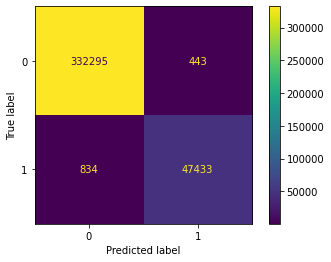

In [48]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

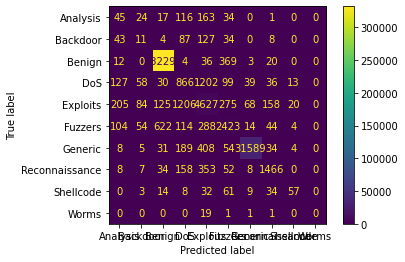

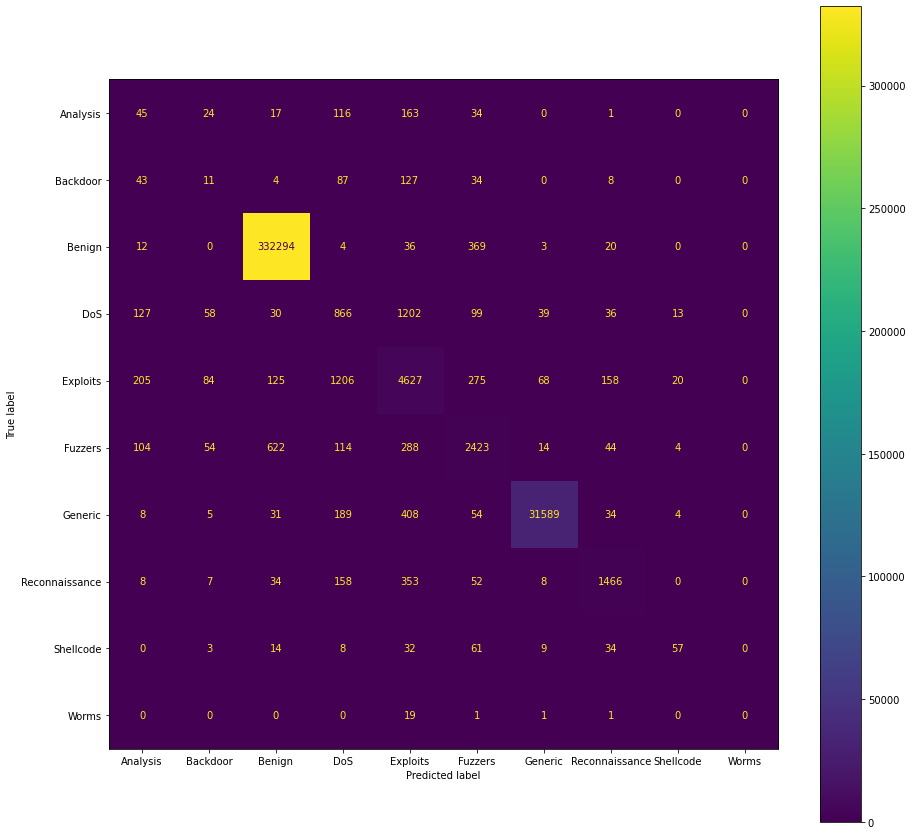

In [49]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)

# Algoritmo kNN para Test50

### Predição Test50 binária

In [50]:
predict_test50_binary = knn_train50_binary.predict(X_test50)

In [51]:
predict_test50_binary

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
y_test50_binary

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.9457102182803708

### Predição test50 multiclasse

In [54]:
predict_test50_multiclass = knn_train50_multiclass.predict(X_test50)

In [55]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Generic', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [56]:
y_test50_multiclass

array(['Benign', 'Benign', 'Generic', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [57]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9289821089149918

### Precision e Recall do test50

In [58]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999244  0.938559  0.967951   1109380
           1   0.701063  0.995095  0.822593    160638

    accuracy                       0.945710   1270018
   macro avg   0.850153  0.966827  0.895272   1270018
weighted avg   0.961528  0.945710  0.949566   1270018



In [59]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.083644  0.117339  0.097667      1338
      Backdoor   0.059880  0.034364  0.043668      1164
        Benign   0.999114  0.938686  0.967958   1109380
           DoS   0.234916  0.450954  0.308910      8176
      Exploits   0.507973  0.671144  0.578268     22262
       Fuzzers   0.294955  0.741731  0.422070     12123
       Generic   0.740947  0.980741  0.844145    107740
Reconnaissance   0.731323  0.676105  0.702630      6993
     Shellcode   0.486486  0.333775  0.395915       755
         Worms   0.500000  0.034483  0.064516        87

      accuracy                       0.928982   1270018
     macro avg   0.463924  0.497932  0.442575   1270018
  weighted avg   0.953324  0.928982  0.937543   1270018



### Matriz de Confusão do test50

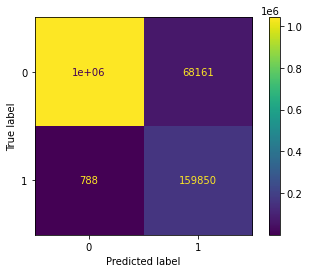

In [60]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_test50, y_test50_binary)
plt.show()

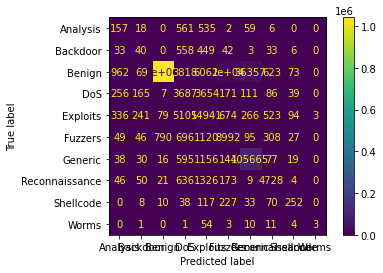

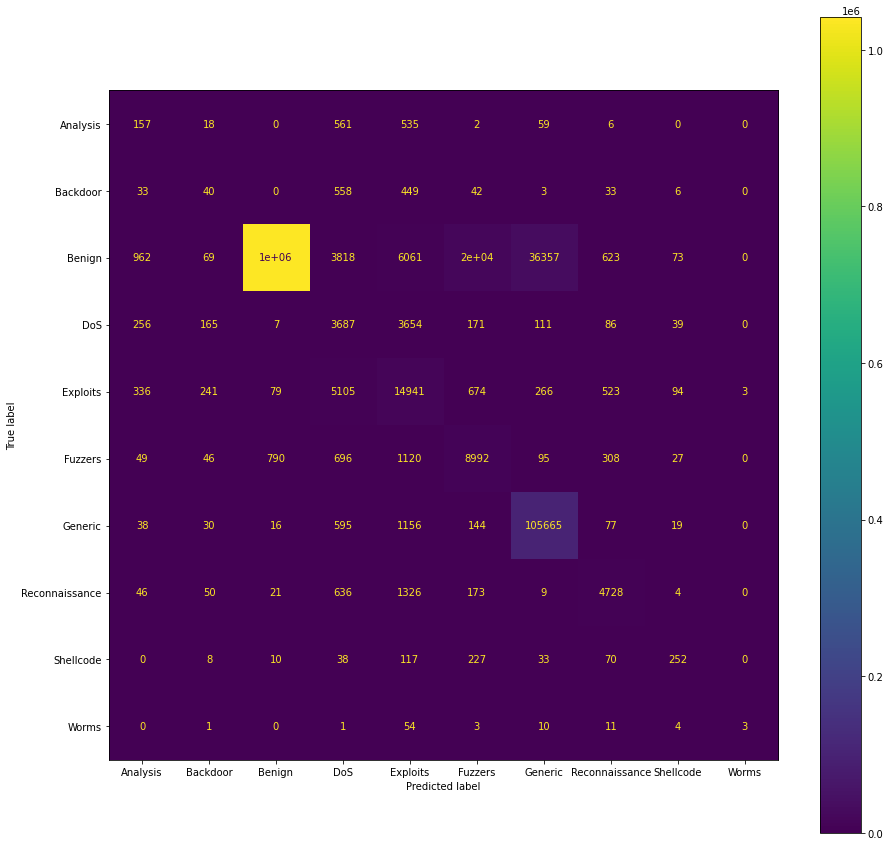

In [61]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)